# Load the dataset

In [1]:
import pandas as pd 

In [2]:
sales_data = pd.read_csv('sales.csv')

# Exploratory Data Analysis

In [3]:
# Explore the dataset
print(sales_data.head())
print(sales_data.info())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [4]:
# Compute descriptive statistics
print("Descriptive Statistics:")
print(sales_data.describe())

Descriptive Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
# Check for missing values
print("\nMissing Values:")
print(sales_data.isnull().sum())


Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# Data Visualisation

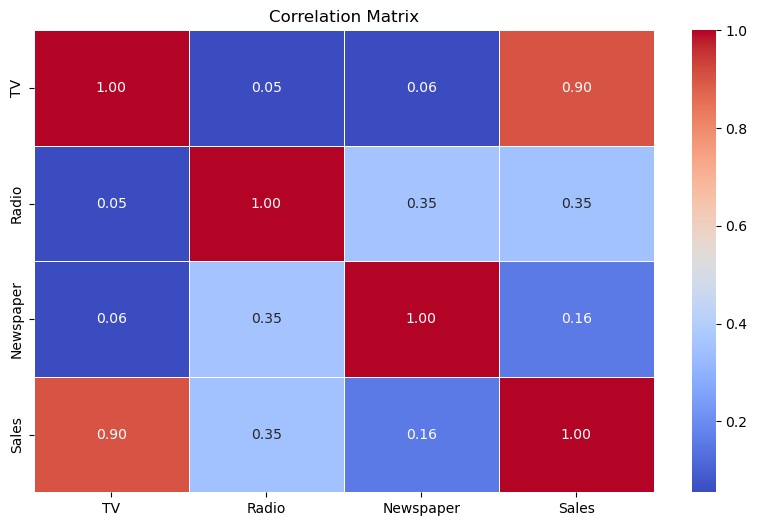

In [6]:
# Visualize the correlation between features and target variable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(sales_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

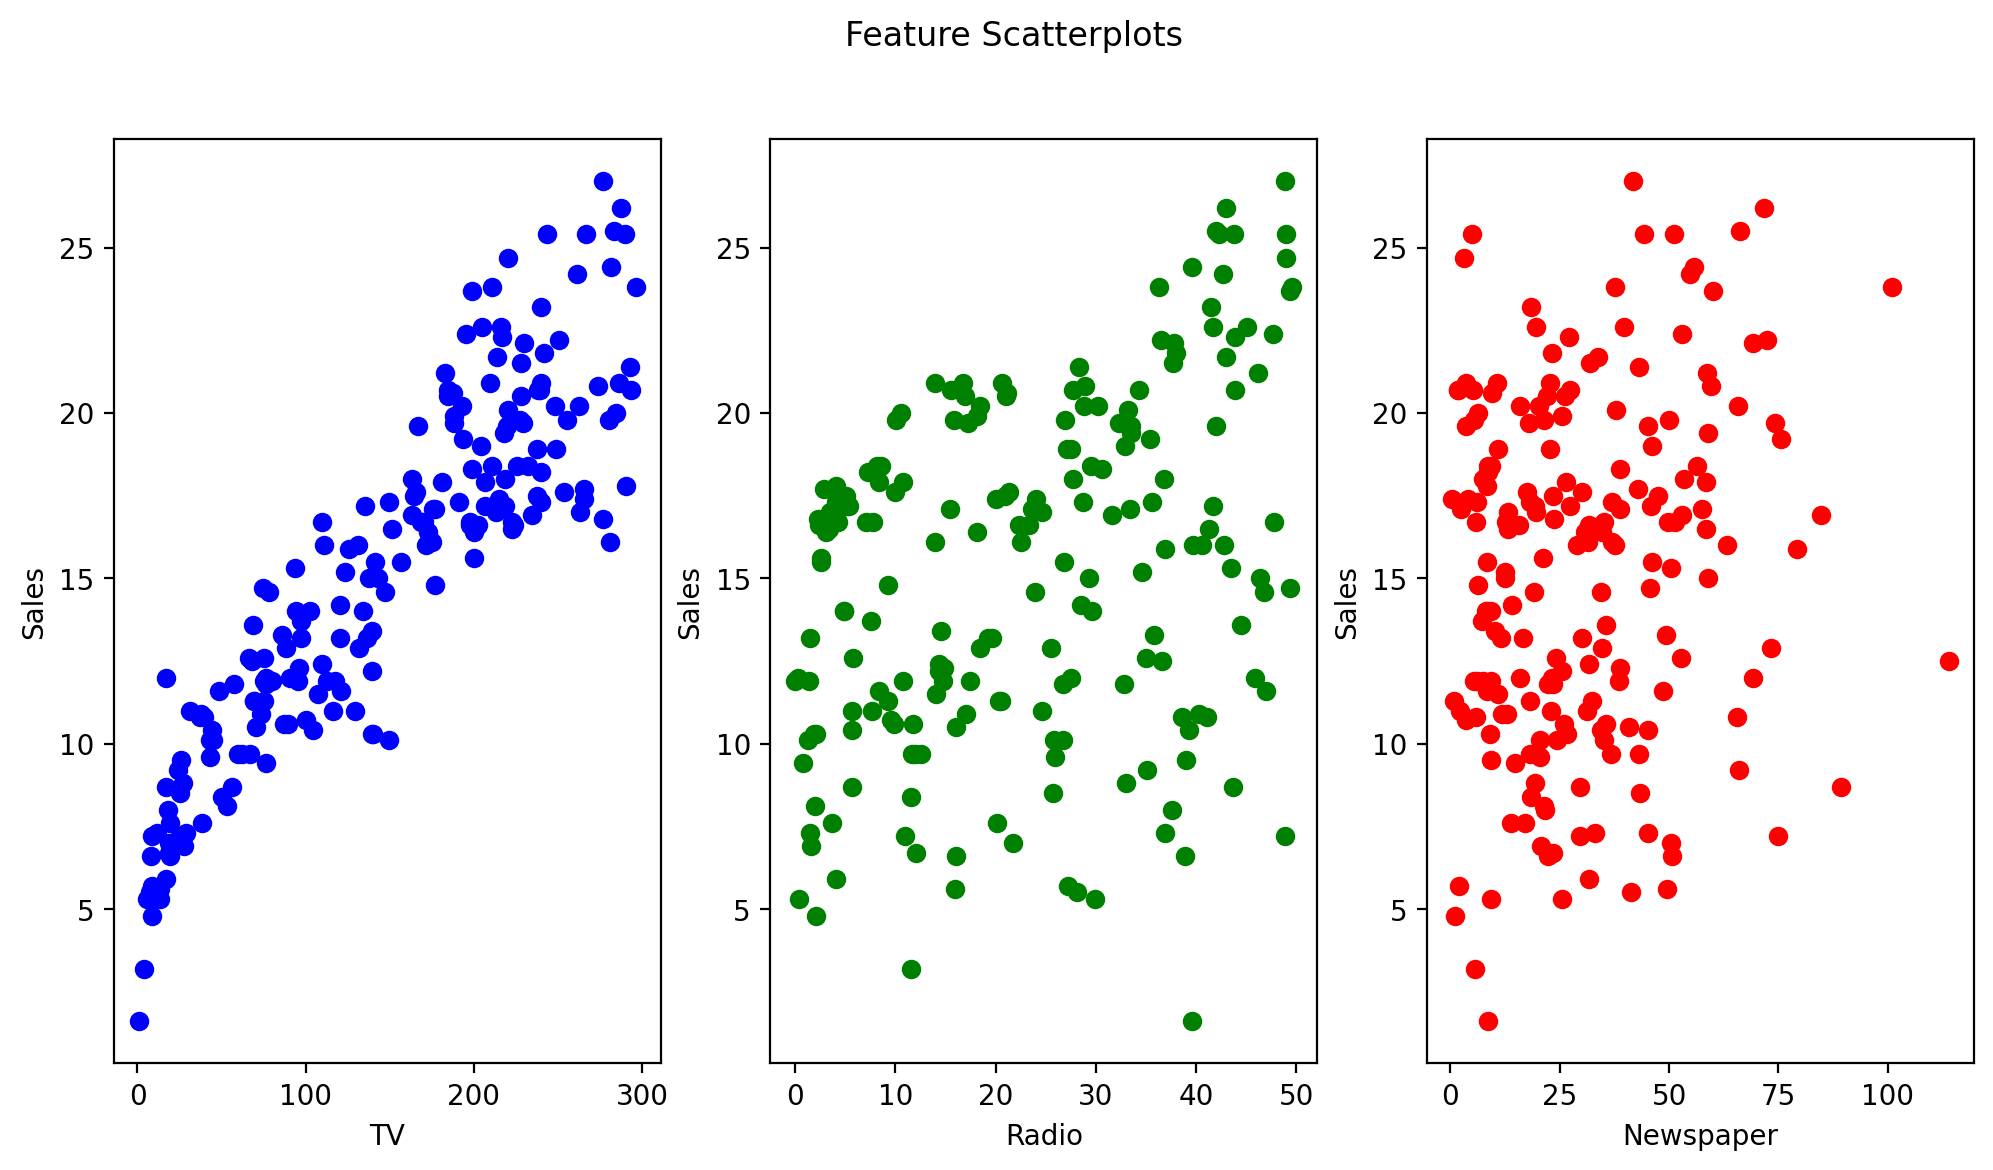

In [23]:
# Feature Scatterplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(sales_data['TV'], sales_data['Sales'], color='blue')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.scatter(sales_data['Radio'], sales_data['Sales'], color='green')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
plt.scatter(sales_data['Newspaper'], sales_data['Sales'], color='red')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.suptitle('Feature Scatterplots')
plt.show()

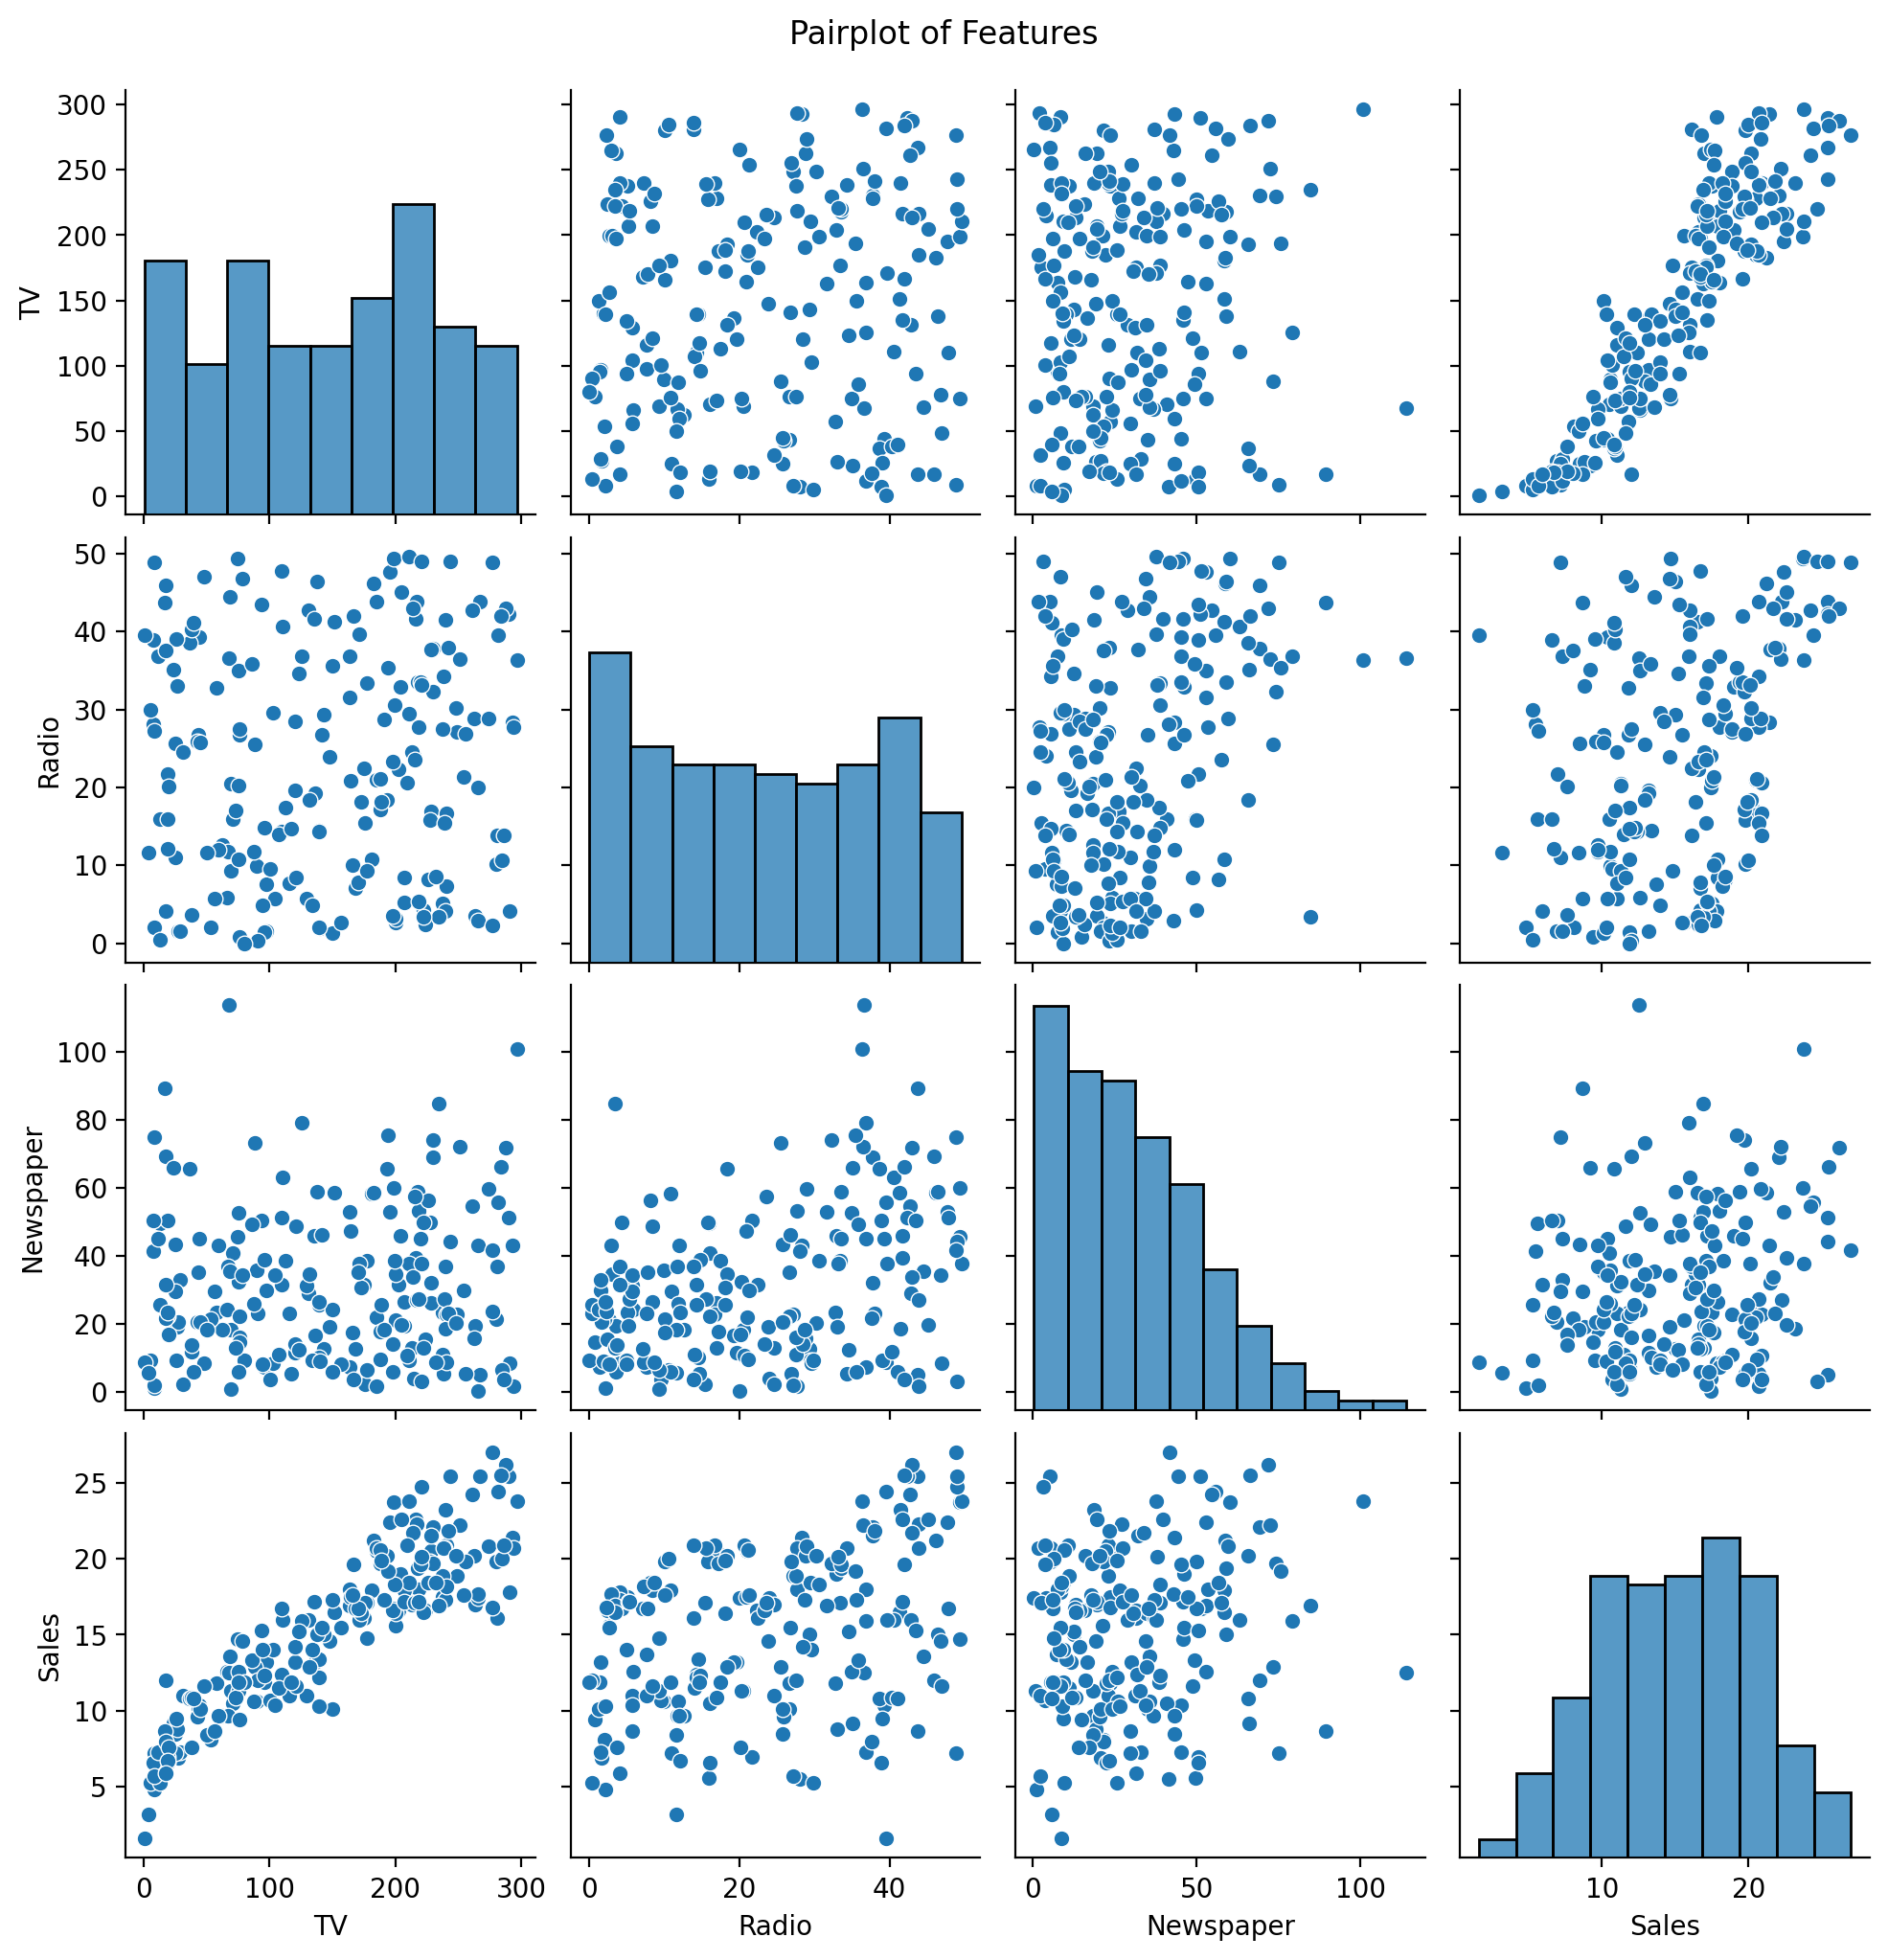

In [12]:
# Pairplot to visualize relationships between features
sns.pairplot(sales_data)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [11]:
# Hiding future warnings for matplotlib in jupyter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Model Preprocessing and Training

In [9]:
# Check the column names of the dataset
print("Column Names:", sales_data.columns)

Column Names: Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [13]:
# Split the data into features (X) and target variable (y)
from sklearn.model_selection import train_test_split
X = sales_data[['TV', 'Radio', 'Newspaper']]
y = sales_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [14]:
# Train the linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [20]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [16]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)


Mean Squared Error: 2.9077569102710896
R-squared Score: 0.9059011844150826


In [17]:
# Additional model evaluation metrics
mae = np.mean(np.abs(y_pred - y_test))
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.2748262109549338


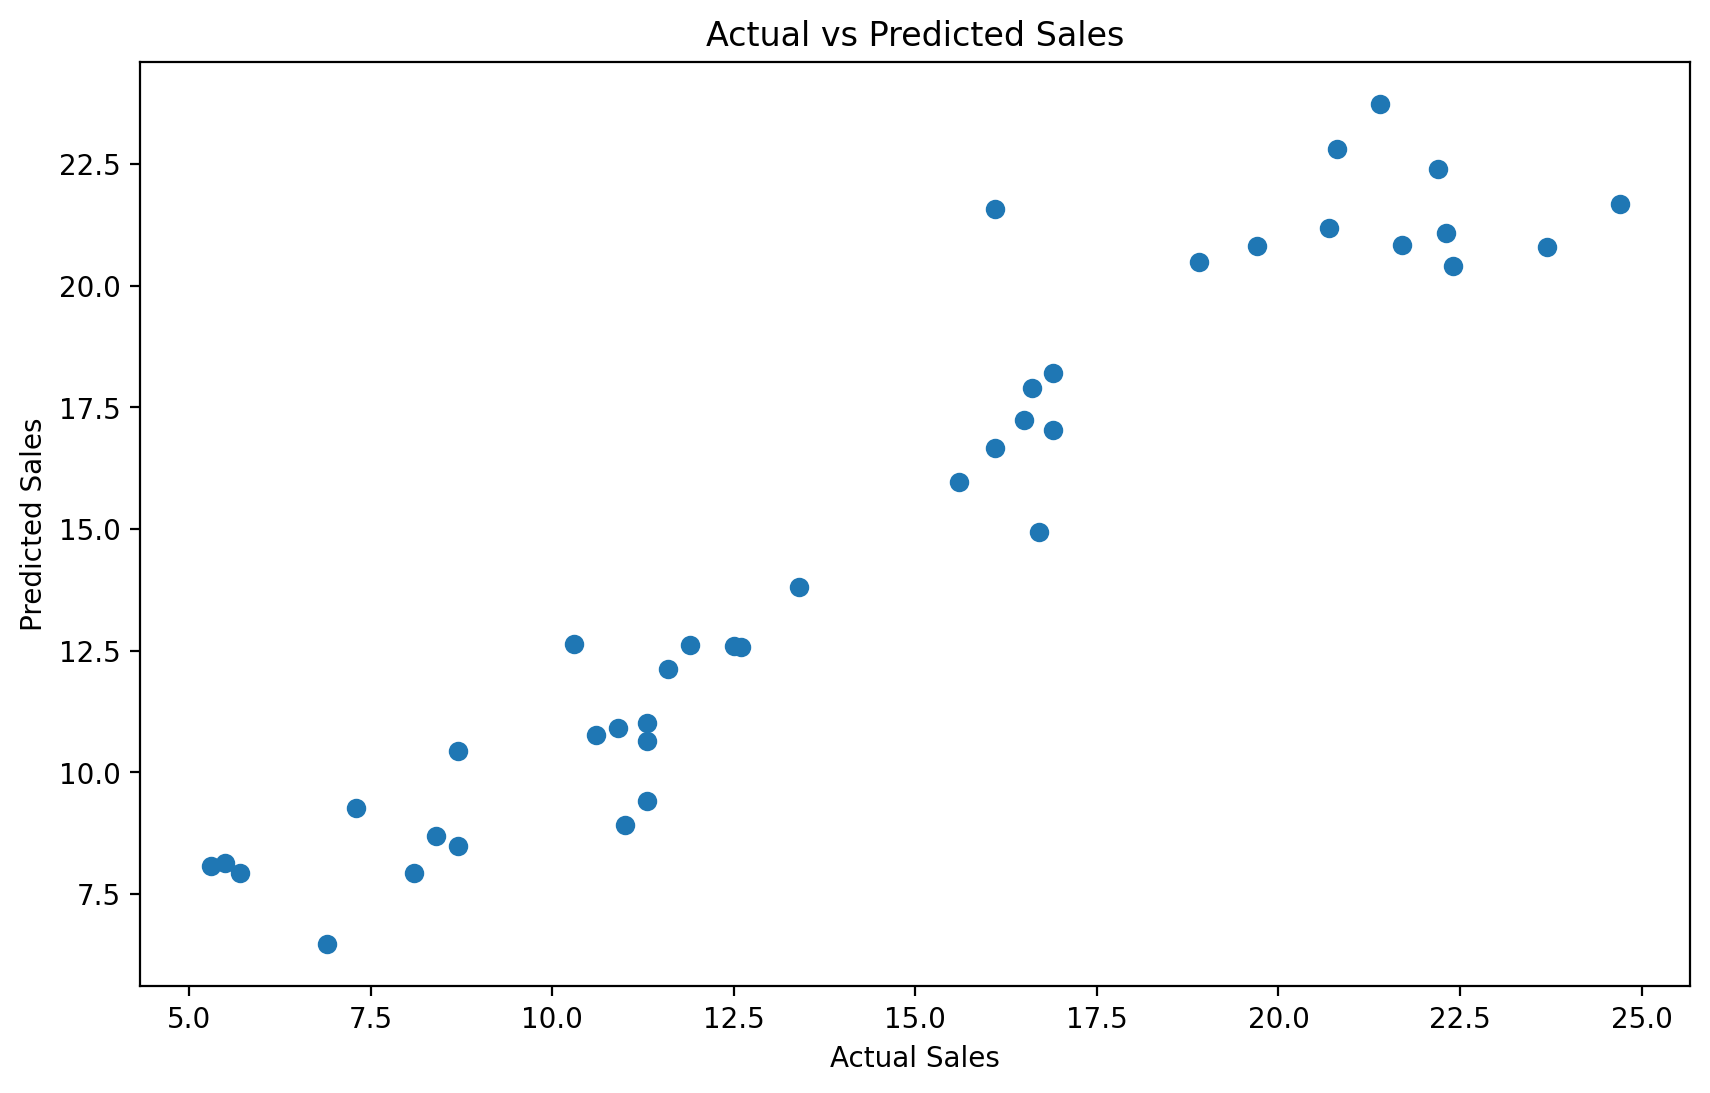

In [18]:
# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

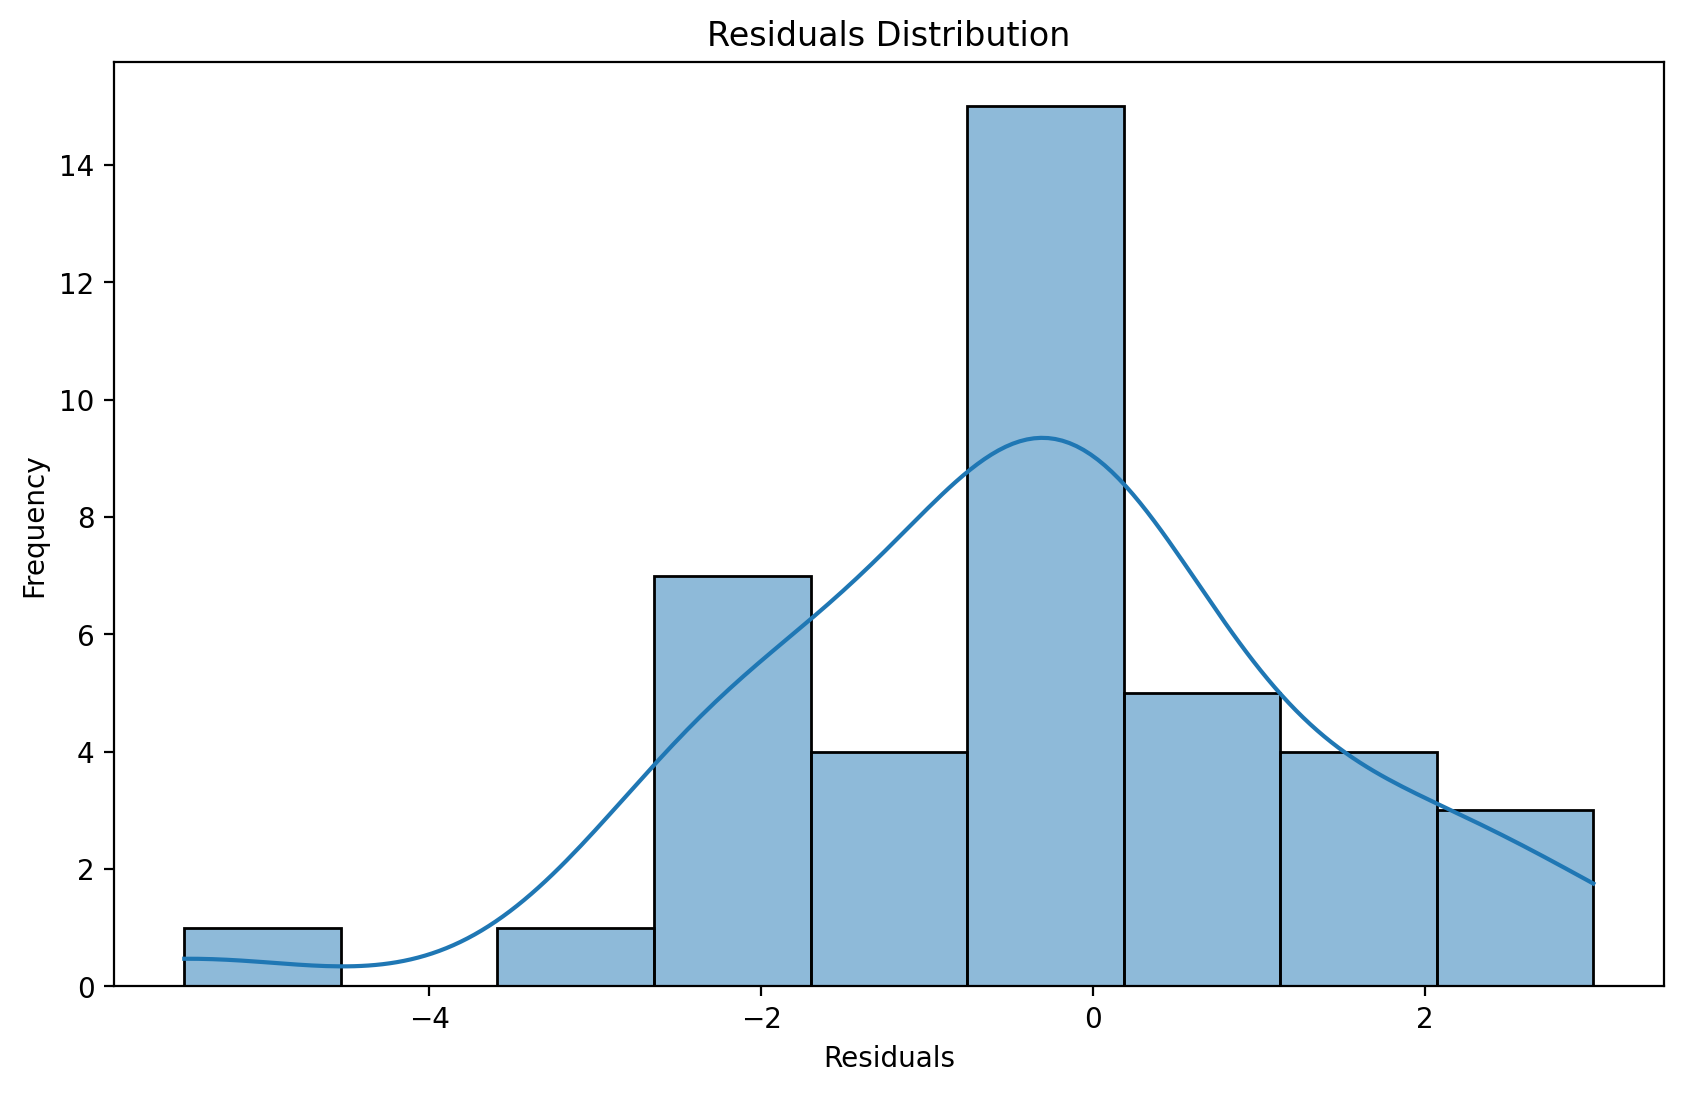

In [19]:
# Visualize the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [21]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print('Feature Importance:')
print(feature_importance)

Feature Importance:
     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337
